# Desarrollo de Modelo

## 1. Lectura de datos
Esta parte leeremos los datos en bruto y mostrar los datos actuales.

In [1]:
# Importar las bibliotecas necesarias
import openpyxl                        # Permite la lectura y manipulación de archivos Excel (.xlsx).
import pandas as pd                    # Para manipulación y análisis de datos en estructuras de DataFrame.
import matplotlib.pyplot as plt        # Para visualización de datos mediante gráficos y figuras.
import seaborn as sns                  # Para visualización avanzada, útil para gráficos estadísticos y mapas de calor.
import numpy as np                     # Para operaciones matemáticas y de álgebra lineal, y generación de arreglos.

# Herramientas de Scikit-Learn para preprocesamiento y modelado
from sklearn.model_selection import train_test_split   # Divide los datos en conjuntos de entrenamiento y prueba.
from sklearn.svm import SVC                            # Implementa el modelo de clasificación de Máquinas de Soporte Vectorial (SVM).
from sklearn.preprocessing import LabelEncoder         # Convierte variables categóricas en valores numéricos.
from sklearn.metrics import mean_absolute_error, recall_score, precision_score, accuracy_score   # Calcula métricas de evaluación para el modelo.

# Biblioteca de imbalanced-learn para balancear datos desbalanceados
from imblearn.over_sampling import SMOTE               # Aplica sobremuestreo para balancear clases minoritarias.

# Métricas de evaluación adicionales
from sklearn.metrics import confusion_matrix, classification_report  # Genera la matriz de confusión y un reporte de clasificación detallado.

from sklearn.model_selection import GridSearchCV                        # Para búsqueda de hiperparámetros en modelos


# Cargar el conjunto de datos desde un archivo Excel
# 'usecols = "B:W"' selecciona solo las columnas de la B a la W para el análisis
students_data = pd.read_excel("./dataset.xlsx","dataset_train",usecols = 'B:W')

# Crear una nueva columna 'approved' que indica si el valor de 'GF' (nota final) es aprobado o no
# Se considera aprobado si la nota es mayor o igual a 10.5
students_data["approved"] = students_data["GF"]>=10.5

# Visualizar las primeras filas del conjunto de datos para verificar la carga y la nueva columna
students_data.head()

,ID,year,period,grade,age,gender,famsize,Pstatus,Medu,Fedu,...,activities,higher,internet,famrel,freetime,health,G1_conduct,course,GF,approved
0,ES201445362,2023,1,4,15,Femenino,Mas de tres,Separados,Educacion Superior,Educacion Superior,...,no,yes,yes,Mal,2 a 5 horas,Mal,20,Razonamiento Matemático,15,True
1,ES201445363,2023,1,4,15,Femenino,Mas de tres,Separados,Educacion Superior,Educacion Superior,...,no,yes,yes,Mal,2 a 5 horas,Mal,20,Razonamiento Matemático,16,True
2,ES201445364,2023,1,4,15,Femenino,Mas de tres,Separados,Educacion Superior,Educacion Superior,...,no,yes,yes,Mal,2 a 5 horas,Mal,20,Razonamiento Matemático,12,True
3,ES201445365,2023,1,4,15,Femenino,Mas de tres,Separados,Educacion Superior,Educacion Superior,...,no,yes,yes,Mal,2 a 5 horas,Mal,20,Razonamiento Matemático,17,True
4,ES201445366,2023,1,4,15,Femenino,Mas de tres,Separados,Educacion Superior,Educacion Superior,...,no,yes,yes,Mal,2 a 5 horas,Mal,20,Razonamiento Matemático,15,True


**Verificamos el tipo de dato de los atributos ⇓**

In [2]:
# Visualizar las tipos de datos de cada atributo
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1336 non-null   object
 1   year        1336 non-null   int64 
 2   period      1336 non-null   int64 
 3   grade       1336 non-null   int64 
 4   age         1336 non-null   int64 
 5   gender      1336 non-null   object
 6   famsize     1336 non-null   object
 7   Pstatus     1336 non-null   object
 8   Medu        1336 non-null   object
 9   Fedu        1336 non-null   object
 10  traveltime  1336 non-null   object
 11  studytime   1336 non-null   object
 12  schoolsup   1336 non-null   object
 13  activities  1336 non-null   object
 14  higher      1336 non-null   object
 15  internet    1336 non-null   object
 16  famrel      1336 non-null   object
 17  freetime    1336 non-null   object
 18  health      1336 non-null   object
 19  G1_conduct  1336 non-null   int64 
 20  course  

### 1.2 Transformación de datos

**Mapear los valores de 'yes'/'no' a True/False**

In [3]:
# Mapear los valores de 'yes'/'no' a True/False
students_data['schoolsup'] = students_data['schoolsup'].map({'yes': True, 'no': False})
students_data['activities'] = students_data['activities'].map({'yes': True, 'no': False})
students_data['higher'] = students_data['higher'].map({'yes': True, 'no': False})
students_data['internet'] = students_data['internet'].map({'yes': True, 'no': False})

# Verificar los cambios
students_data[['schoolsup', 'activities', 'higher', 'internet']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   schoolsup   1336 non-null   bool 
 1   activities  1336 non-null   bool 
 2   higher      1336 non-null   bool 
 3   internet    1336 non-null   bool 
dtypes: bool(4)
memory usage: 5.3 KB


**Separando las columnas numéricas y categóricas**

In [4]:
# Seleccionar las columnas categóricas y numéricas
num_col = students_data._get_numeric_data().columns.tolist()
cat_col = set(students_data.columns) - set(num_col)

# Imprimir las columnas categóricas y numéricas
print("Columnas categóricas:", cat_col)
print("Columnas numéricas:", num_col)

Columnas categóricas: {'famrel', 'freetime', 'traveltime', 'course', 'studytime', 'ID', 'health', 'gender', 'famsize', 'Fedu', 'Medu', 'Pstatus'}
Columnas numéricas: ['year', 'period', 'grade', 'age', 'schoolsup', 'activities', 'higher', 'internet', 'G1_conduct', 'GF', 'approved']


**Cambiar variables categóricas en valores numéricos**

In [5]:
# Inicializar el codificador
le = LabelEncoder()

# Crear nuevas columnas codificadas para variables categóricas
students_data['gender_code'] = le.fit_transform(students_data['gender'])
students_data['famsize_code'] = le.fit_transform(students_data['famsize'])
students_data['Pstatus_code'] = le.fit_transform(students_data['Pstatus'])
students_data['Medu_code'] = le.fit_transform(students_data['Medu'])
students_data['Fedu_code'] = le.fit_transform(students_data['Fedu'])
students_data['traveltime_code'] = le.fit_transform(students_data['traveltime'])
students_data['studytime_code'] = le.fit_transform(students_data['studytime'])
students_data['schoolsup_code'] = le.fit_transform(students_data['schoolsup'])
students_data['activities_code'] = le.fit_transform(students_data['activities'])
students_data['higher_code'] = le.fit_transform(students_data['higher'])
students_data['internet_code'] = le.fit_transform(students_data['internet'])
students_data['famrel_code'] = le.fit_transform(students_data['famrel'])
students_data['freetime_code'] = le.fit_transform(students_data['freetime'])
students_data['famrel_code'] = le.fit_transform(students_data['famrel'])
students_data['health_code'] = le.fit_transform(students_data['health'])
students_data['course_code'] = le.fit_transform(students_data['course'])
students_data['health_code'] = le.fit_transform(students_data['health'])
students_data['approved_code'] = le.fit_transform(students_data['approved'])

**HEATMAP de Correlación de Variables**

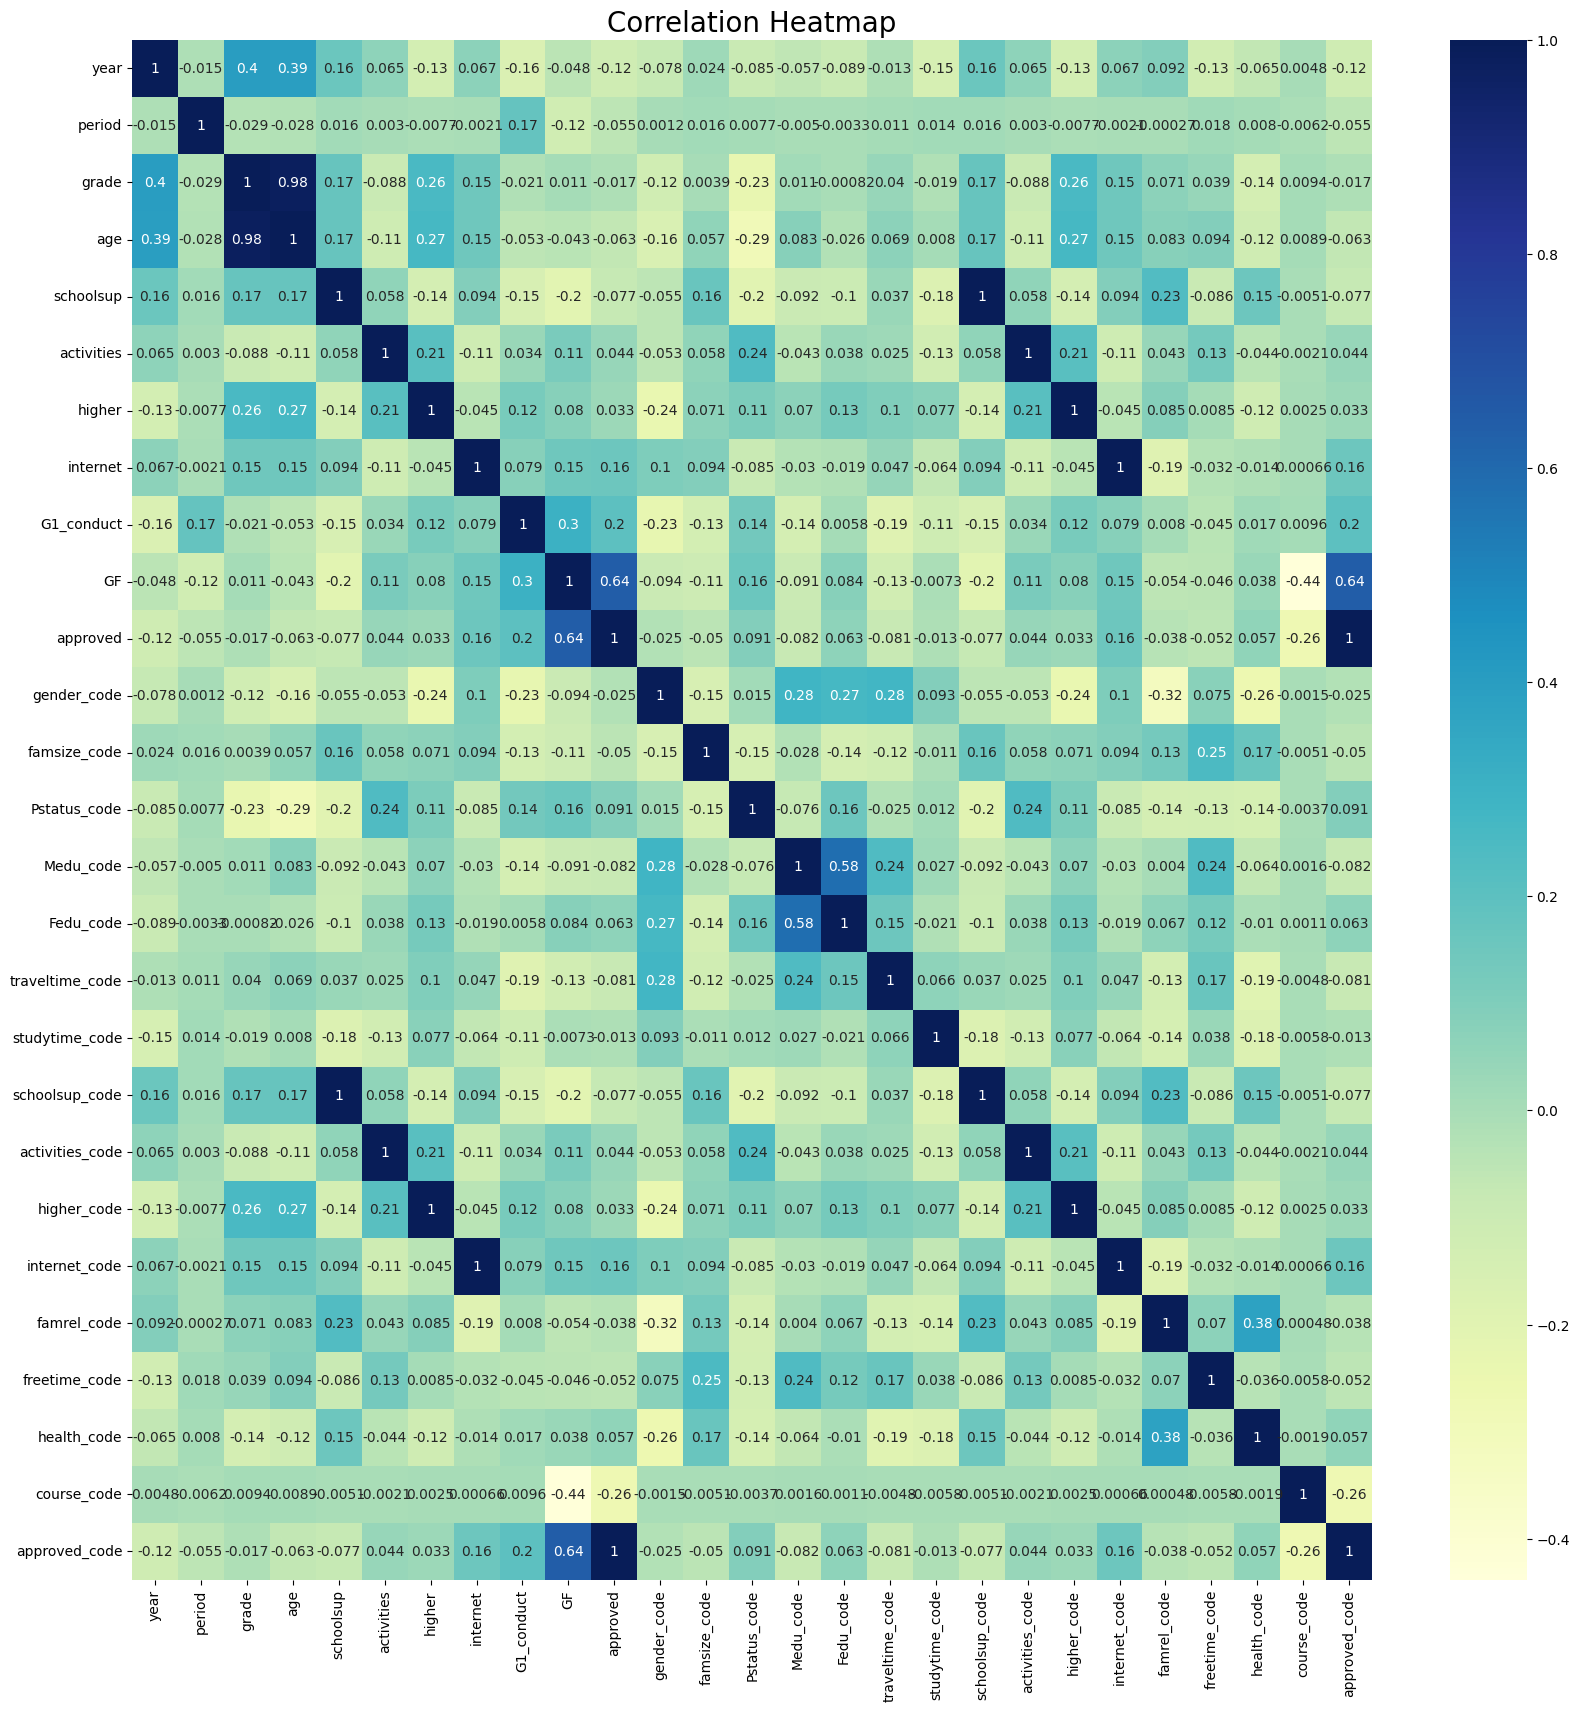

In [6]:
# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
num_data = students_data.select_dtypes(include=['int64', 'int32', 'bool'])

# Calcular la matriz de correlación entre las variables numéricas
corr_matrix = num_data.corr()

# Configurar el tamaño de la figura para que el mapa de calor sea legible
plt.figure(figsize=(20,20))
# Generar el mapa de calor de la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

# Agregar un título al gráfico
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

## 2. Selección de datos para entrenamiento y datos de prueba y SMOTE
Esta parte del flujo consiste en seleccionar las características y dividir los datos en datos de entrenamiento y datos de prueba.

In [7]:
students_features=['year','period','grade','age','gender_code','famsize_code','Pstatus_code','Medu_code','Fedu_code',
                   'traveltime_code','studytime_code','schoolsup_code',
                   'activities_code','higher_code','internet_code','famrel_code','freetime_code','health_code','G1_conduct',
                   'course_code']
# Eliminar NaNs
students_data_without_nans = students_data.dropna()

# Objetivo (variable a predecir)
y = students_data_without_nans["approved_code"]

# Características (variables predictoras)
X = students_data_without_nans[students_features]

**Aplicar SMOTE**

In [8]:
# Definir el método SMOTE para realizar sobremuestreo en la clase minoritaria
smote = SMOTE(random_state=0)

# Aplicar SMOTE al conjunto de datos para crear un conjunto balanceado
X_resampled, y_resampled = smote.fit_resample(X, y)

# Ahora, X_resampled y y_resampled contienen un conjunto de datos balanceado

**Dividir en conjuntos de entrenamiento y validación**

In [9]:
# Dividir en conjuntos de entrenamiento y validación
train_X, val_X, train_y, val_y = train_test_split(X_resampled, y_resampled, random_state=0)

## 3. Entrenamiento de diferentes algoritmos
En esta parte vamos a pasar los datos de entrenamiento al modelo y hacer algunas predicciones.

### SVM Linear

In [10]:
# Definir el modelo SVM
classifier_svm_linear = SVC(C=100, gamma=1, kernel='linear', class_weight='balanced', random_state=0)

# Entrenar el modelo en el conjunto de entrenamiento
classifier_svm_linear.fit(train_X, train_y)

# Predecir los resultados del conjunto de validación con el mejor modelo encontrado
y_pred_SVC_linear = classifier_svm_linear.predict(val_X)

# Matriz de confusión
cm_SVM_linear = confusion_matrix(val_y, y_pred_SVC_linear)

# Reporte de clasificación
report_SVC = classification_report(val_y, y_pred_SVC_linear)
print("Reporte de Clasificación:\n", report_SVC)

# Mostrar la matriz de confusión
print("\n Matriz de Confusión:\n")
pd.DataFrame(cm_SVM_linear, columns=['Predicción NO', 'Predicción SI'], index=['Real NO', 'Real SI'])

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       273
           1       0.85      0.76      0.80       303

    accuracy                           0.80       576
   macro avg       0.80      0.80      0.80       576
weighted avg       0.80      0.80      0.80       576


 Matriz de Confusión:



,Predicción NO,Predicción SI
Real NO,231,42
Real SI,73,230


### SVM RBF

In [11]:
# Definir el modelo SVM
classifier_svm_rbf = SVC(C=10, gamma=0.1, kernel='rbf', class_weight='balanced', random_state=0)

# Entrenar el modelo en el conjunto de entrenamiento
classifier_svm_rbf.fit(train_X, train_y)

# Predecir los resultados del conjunto de validación con el mejor modelo encontrado
y_pred_SVC_rbf = classifier_svm_rbf.predict(val_X)

# Matriz de confusión
cm_SVM_rbf = confusion_matrix(val_y, y_pred_SVC_rbf)

# Reporte de clasificación
report_SVC = classification_report(val_y, y_pred_SVC_rbf, zero_division=1)
print("Reporte de Clasificación:\n", report_SVC)

# Mostrar la matriz de confusión
print("\n Matriz de Confusión:\n")
pd.DataFrame(cm_SVM_rbf, columns=['Predicción NO', 'Predicción SI'], index=['Real NO', 'Real SI'])

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       273
           1       0.96      0.89      0.93       303

    accuracy                           0.93       576
   macro avg       0.93      0.93      0.93       576
weighted avg       0.93      0.93      0.93       576


 Matriz de Confusión:



,Predicción NO,Predicción SI
Real NO,262,11
Real SI,32,271


### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression                    # Para modelo de regresión logística
from sklearn.preprocessing import StandardScaler                       # Para normalizar características

# Escalar los datos
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
val_X_scaled = scaler.transform(val_X)

# Definir el modelo de regresión logística
classifier_lr = LogisticRegression(random_state=0, max_iter=2000)
classifier_lr.fit(train_X_scaled, train_y)

# Predecir los resultados del conjunto de validación
y_pred_logistic = classifier_lr.predict(val_X_scaled)

# Matriz de confusión
cm_logistic = confusion_matrix(val_y, y_pred_logistic)

# Reporte de clasificación
report_logistic = classification_report(val_y, y_pred_logistic)
print("Reporte de Clasificación:\n", report_logistic)

# Mostrar la matriz de confusión
print("\n Matriz de Confusión:\n")
pd.DataFrame(cm_logistic, columns=['Predicción NO', 'Predicción SI'], index=['Real NO', 'Real SI'])

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       273
           1       0.81      0.76      0.78       303

    accuracy                           0.78       576
   macro avg       0.78      0.78      0.78       576
weighted avg       0.78      0.78      0.78       576


 Matriz de Confusión:



,Predicción NO,Predicción SI
Real NO,220,53
Real SI,74,229


### KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier                     # Para modelo de clasificación K-Nearest Neighbors

# Definir el modelo K-Nearest Neighbors (KNN) con 5 vecinos y la métrica de Minkowski
classifier_knn=KNeighborsClassifier(n_neighbors=15,metric='minkowski',p=2)

# Entrenar el modelo en los datos de entrenamiento
classifier_knn.fit(train_X,train_y)

# Predecir el conjunto de validacion de prueba
y_pred_knn= classifier_knn.predict(val_X)

# Crear la matriz de confusión para evaluar el rendimiento del modelo
from sklearn.metrics import confusion_matrix
cm_knn= confusion_matrix(val_y, y_pred_knn)

# Generar el reporte de clasificación que incluye precisión, recall y F1-score
report_knn=classification_report(val_y,y_pred_knn)
print("Reporte de Clasificación:\n", report_knn)

# Mostrar la matriz de confusión en un DataFrame para una visualización clara
print("\n Matriz de Confusión:\n")
pd.DataFrame(cm_knn, columns = ['Predicción NO','Predicción SI'] , index =['Real NO','Real SI'])

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       273
           1       0.95      0.74      0.83       303

    accuracy                           0.84       576
   macro avg       0.86      0.85      0.84       576
weighted avg       0.86      0.84      0.84       576


 Matriz de Confusión:



,Predicción NO,Predicción SI
Real NO,260,13
Real SI,78,225


### XGBoost

In [14]:
from xgboost import XGBClassifier                                      # Para modelo de clasificación basado en XGBoost

# Definir el modelo XGBoost para clasificación
classifier_xgb = XGBClassifier()

# Entrenar el modelo en los datos de entrenamiento
classifier_xgb.fit(train_X,train_y)

# Predecir el conjunto de validacion de prueba
y_pred_XG= classifier_xgb.predict(val_X)

# Crear la matriz de confusión para evaluar el rendimiento del modelo
cm_xgb= confusion_matrix(val_y,y_pred_XG)

# Generar el reporte de clasificación con precisión, recall y F1-score
report_xgb=classification_report(val_y,y_pred_XG)
print("Reporte de Clasificación:\n", report_xgb)

# Mostrar la matriz de confusión en un DataFrame para una visualización clara
print("\n Matriz de Confusión:\n")
pd.DataFrame(cm_xgb, columns = ['Predicción NO','Predicción SI'] , index =['Real NO','Real SI'])

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       273
           1       0.95      0.92      0.93       303

    accuracy                           0.93       576
   macro avg       0.93      0.93      0.93       576
weighted avg       0.93      0.93      0.93       576


 Matriz de Confusión:



,Predicción NO,Predicción SI
Real NO,257,16
Real SI,25,278


### Decision Tree

In [15]:
df_encoded = pd.get_dummies(students_data.drop(['ID'], axis=1), drop_first=True)
x = df_encoded.drop('approved', axis=1)
y = df_encoded['approved']

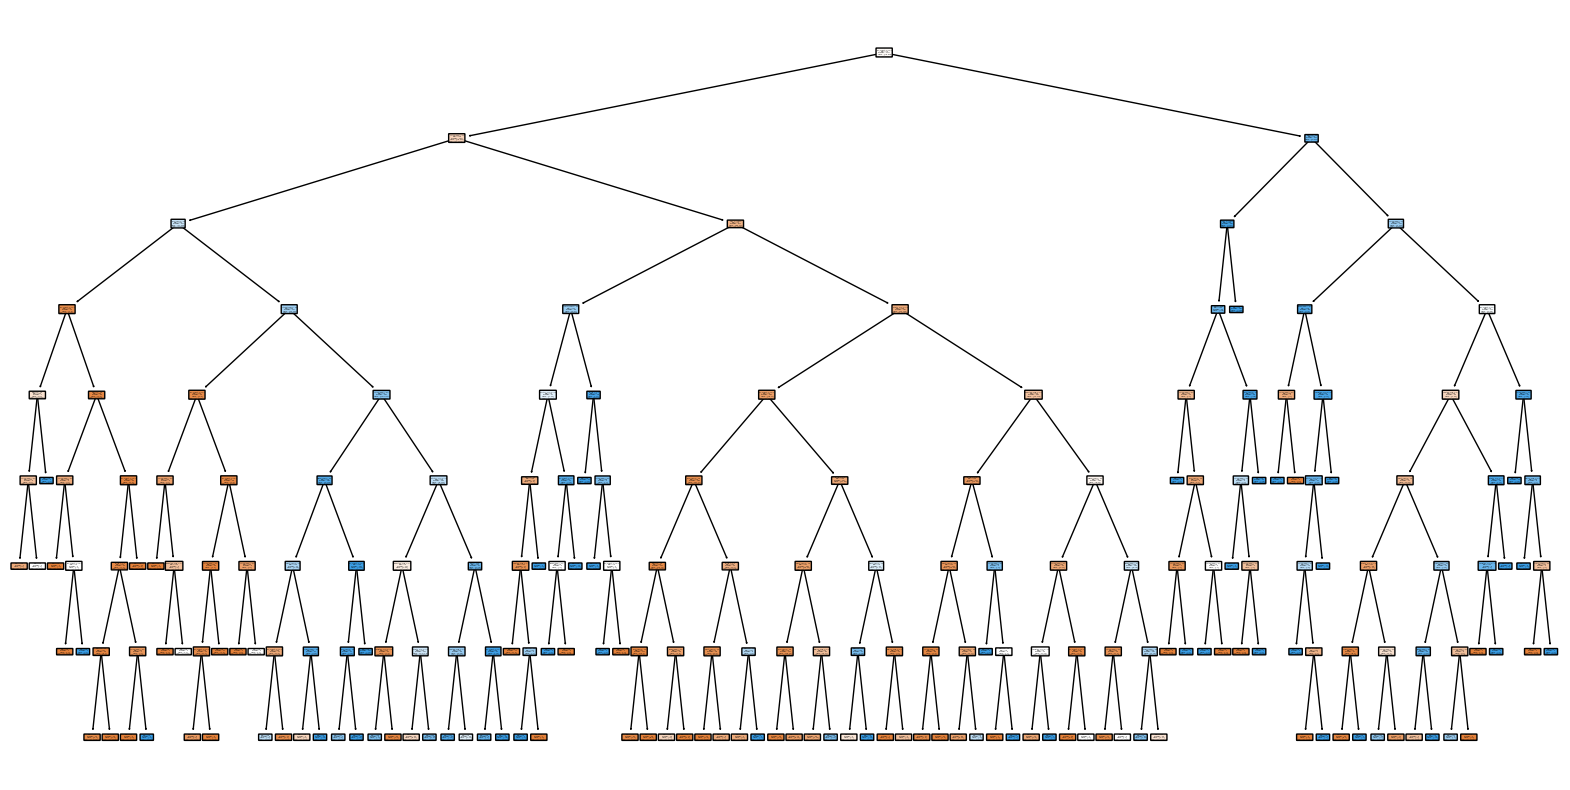

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       273
           1       0.92      0.78      0.84       303

    accuracy                           0.85       576
   macro avg       0.86      0.85      0.85       576
weighted avg       0.86      0.85      0.85       576


 Matriz de Confusión:



,Predicción NO,Predicción SI
Real NO,252,21
Real SI,66,237


In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree             # Para modelo de árboles de decisión y su visualización

# Definir el modelo Random Forest con 100 árboles y una semilla para reproducibilidad
classifier_dt =DecisionTreeClassifier(max_depth=8, random_state=42)

# Entrenar el modelo en los datos de entrenamiento
classifier_dt.fit(train_X, train_y)

# Predecir el conjunto de validacion de prueba
y_pred_DT = classifier_dt.predict(val_X)

# Visualizar Decision Tree
plt.figure(figsize=(20,10))  # Ajustar el tamaño según la profundidad y complejidad de tu árbol
plot_tree(classifier_dt, filled=True, feature_names=X.columns, class_names=['Not Approved', 'Approved'], rounded=True, proportion=False, precision=2)
plt.show()

# Crear la matriz de confusión para evaluar el rendimiento del modelo
cm_dt = confusion_matrix(val_y, y_pred_DT)

# Generar el reporte de clasificación, que incluye precisión, recall y F1-score
report = classification_report(val_y, y_pred_DT)
print("Reporte de Clasificación:\n", report)

# Mostrar la matriz de confusión en un DataFrame para una visualización clara
print("\n Matriz de Confusión:\n")
pd.DataFrame(cm_dt, columns = ['Predicción NO','Predicción SI'] , index =['Real NO','Real SI'])

### Random Forest

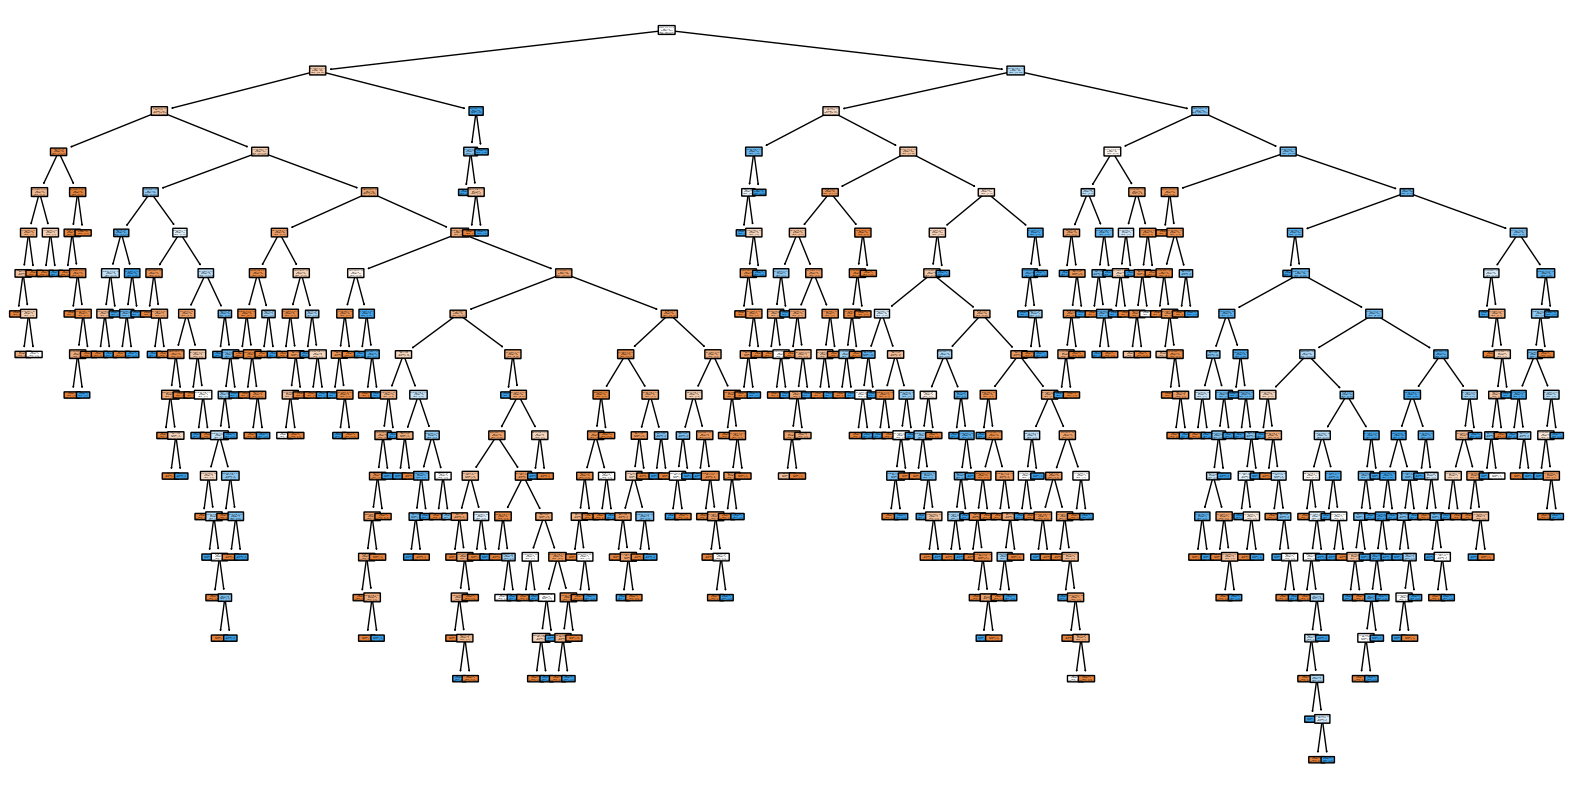

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       273
           1       0.95      0.93      0.94       303

    accuracy                           0.94       576
   macro avg       0.94      0.94      0.94       576
weighted avg       0.94      0.94      0.94       576


 Matriz de Confusión:



,Predicción NO,Predicción SI
Real NO,259,14
Real SI,22,281


In [17]:
from sklearn.ensemble import RandomForestClassifier                    # Para modelo de bosque aleatorio

# Definir el modelo Random Forest con 100 árboles y una semilla para reproducibilidad
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo en los datos de entrenamiento
classifier_rf.fit(train_X, train_y)

# Predecir el conjunto de validacion de prueba
y_pred_RF = classifier_rf.predict(val_X)

# Seleccionar un árbol específico del conjunto de árboles en el Random Forest
# En este caso, estamos eligiendo el primer árbol (estimador 0)
single_tree = classifier_rf.estimators_[0]

# Visualizar el árbol seleccionado
plt.figure(figsize=(20,10))  # Ajustar el tamaño según la profundidad y complejidad de tu árbol
plot_tree(single_tree, filled=True, feature_names=X.columns, class_names=['Not Approved', 'Approved'], rounded=True, proportion=False, precision=2)
plt.show()

# Crear la matriz de confusión para evaluar el rendimiento del modelo
cm_rf = confusion_matrix(val_y, y_pred_RF)

# Generar el reporte de clasificación, que incluye precisión, recall y F1-score
report = classification_report(val_y, y_pred_RF)
print("Reporte de Clasificación:\n", report)

# Mostrar la matriz de confusión en un DataFrame para una visualización clara
print("\n Matriz de Confusión:\n")
pd.DataFrame(cm_rf, columns = ['Predicción NO','Predicción SI'] , index =['Real NO','Real SI'])

## 4. Comparación de Modelos

In [18]:
from sklearn.metrics import (accuracy_score, f1_score, precision_score, 
                             recall_score, roc_curve, roc_auc_score,    # Métricas de evaluación de modelos de clasificación
                             confusion_matrix, classification_report)
model_metrics = {}

# Evaluar Suppert Vector Machine Linear
pred_svml= y_pred_SVC_linear
model_metrics['SVM_L'] = {
    'Accuracy': accuracy_score(val_y, pred_svml),
    'Precision': precision_score(val_y, pred_svml, average='macro'),
    'Recall': recall_score(val_y, pred_svml, average='macro'),
    'F1': f1_score(val_y, pred_svml, average='macro')
}

# Evaluar Suppert Vector Machine RBG
pred_svmr= y_pred_SVC_rbf
model_metrics['SVM_RBF'] = {
    'Accuracy': accuracy_score(val_y, pred_svmr),
    'Precision': precision_score(val_y, pred_svmr, average='macro'),
    'Recall': recall_score(val_y, pred_svmr, average='macro'),
    'F1': f1_score(val_y, pred_svmr, average='macro')
}

# Evaluar LR
pred_lr= y_pred_logistic
model_metrics['LR'] = {
    'Accuracy': accuracy_score(val_y, pred_lr),
    'Precision': precision_score(val_y, pred_lr, average='macro'),
    'Recall': recall_score(val_y, pred_lr, average='macro'),
    'F1': f1_score(val_y, pred_lr, average='macro')
}

# Evaluar KNN
pred_knn= y_pred_knn
model_metrics['KNN'] = {
    'Accuracy': accuracy_score(val_y, pred_knn),
    'Precision': precision_score(val_y, pred_knn, average='macro'),
    'Recall': recall_score(val_y, pred_knn, average='macro'),
    'F1': f1_score(val_y, pred_knn, average='macro')
}

# Evaluar XG Boost
pred_XG= y_pred_XG
model_metrics['XGBoost'] = {
    'Accuracy': accuracy_score(val_y, pred_XG),
    'Precision': precision_score(val_y, pred_XG, average='macro'),
    'Recall': recall_score(val_y, pred_XG, average='macro'),
    'F1': f1_score(val_y, pred_XG, average='macro')
}

# Evaluar Decision Tree
pred_dt = y_pred_DT
model_metrics['DT'] = {
    'Accuracy': accuracy_score(val_y, pred_dt),
    'Precision': precision_score(val_y, pred_dt, average='macro'),
    'Recall': recall_score(val_y, pred_dt, average='macro'),
    'F1': f1_score(val_y, pred_dt, average='macro')
}


# Evaluar Random Forest
pred_rf = y_pred_RF
model_metrics['RF'] = {
    'Accuracy': accuracy_score(val_y, pred_rf),
    'Precision': precision_score(val_y, pred_rf, average='macro'),
    'Recall': recall_score(val_y, pred_rf, average='macro'),
    'F1': f1_score(val_y, pred_rf, average='macro')
}

### 4.1 curva ROC

SVM Linear
SVM RBF
Logistic Regression
KNN
XGBoost
Decision Tree
Random Forest


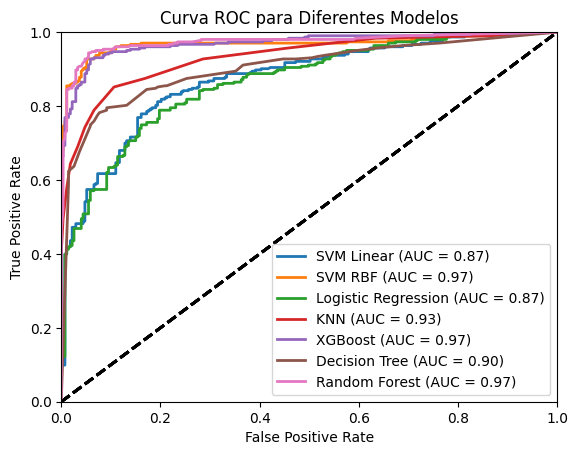

In [19]:
# Función para graficar la curva ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# SVM Linear
print("SVM Linear")
y_pred_proba_SVC_linear = classifier_svm_linear.decision_function(val_X)
fpr, tpr, thresholds = roc_curve(val_y, y_pred_proba_SVC_linear)
auc_SVC_linear = roc_auc_score(val_y, y_pred_proba_SVC_linear)
plot_roc_curve(fpr, tpr, label=f"SVM Linear (AUC = {auc_SVC_linear:.2f})")

# SVM RBF
print("SVM RBF")
y_pred_proba_SVC_rbf = classifier_svm_rbf.decision_function(val_X)
fpr, tpr, thresholds = roc_curve(val_y, y_pred_proba_SVC_rbf)
auc_SVC_rbf = roc_auc_score(val_y, y_pred_proba_SVC_rbf)
plot_roc_curve(fpr, tpr, label=f"SVM RBF (AUC = {auc_SVC_rbf:.2f})")

# Logistic Regression
print("Logistic Regression")
y_pred_proba_logistic = classifier_lr.predict_proba(val_X_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(val_y, y_pred_proba_logistic)
auc_logistic = roc_auc_score(val_y, y_pred_proba_logistic)
plot_roc_curve(fpr, tpr, label=f"Logistic Regression (AUC = {auc_logistic:.2f})")

# KNN
print("KNN")
y_pred_proba_knn = classifier_knn.predict_proba(val_X)[:, 1]
fpr, tpr, thresholds = roc_curve(val_y, y_pred_proba_knn)
auc_knn = roc_auc_score(val_y, y_pred_proba_knn)
plot_roc_curve(fpr, tpr, label=f"KNN (AUC = {auc_knn:.2f})")

# XGBoost
print("XGBoost")
y_pred_proba_XG = classifier_xgb.predict_proba(val_X)[:, 1]  # Probabilidad de la clase positiva
fpr, tpr, thresholds = roc_curve(val_y, y_pred_proba_XG)
auc_XG = roc_auc_score(val_y, y_pred_proba_XG)
plot_roc_curve(fpr, tpr, label=f"XGBoost (AUC = {auc_XG:.2f})")

# Decision Tree
print("Decision Tree")
y_pred_proba_DT = classifier_dt.predict_proba(val_X)[:, 1]
fpr, tpr, thresholds = roc_curve(val_y, y_pred_proba_DT)
auc_DT = roc_auc_score(val_y, y_pred_proba_DT)
plot_roc_curve(fpr, tpr, label=f"Decision Tree (AUC = {auc_DT:.2f})")

# Random Forest
print("Random Forest")
y_pred_proba_RF = classifier_rf.predict_proba(val_X)[:, 1]
fpr, tpr, thresholds = roc_curve(val_y, y_pred_proba_RF)
auc_RF = roc_auc_score(val_y, y_pred_proba_RF)
plot_roc_curve(fpr, tpr, label=f"Random Forest (AUC = {auc_RF:.2f})")

# Mostrar la leyenda y el gráfico
plt.legend(loc='lower right')
plt.title('Curva ROC para Diferentes Modelos')
plt.show()


### 4.2 Matriz de Confusión

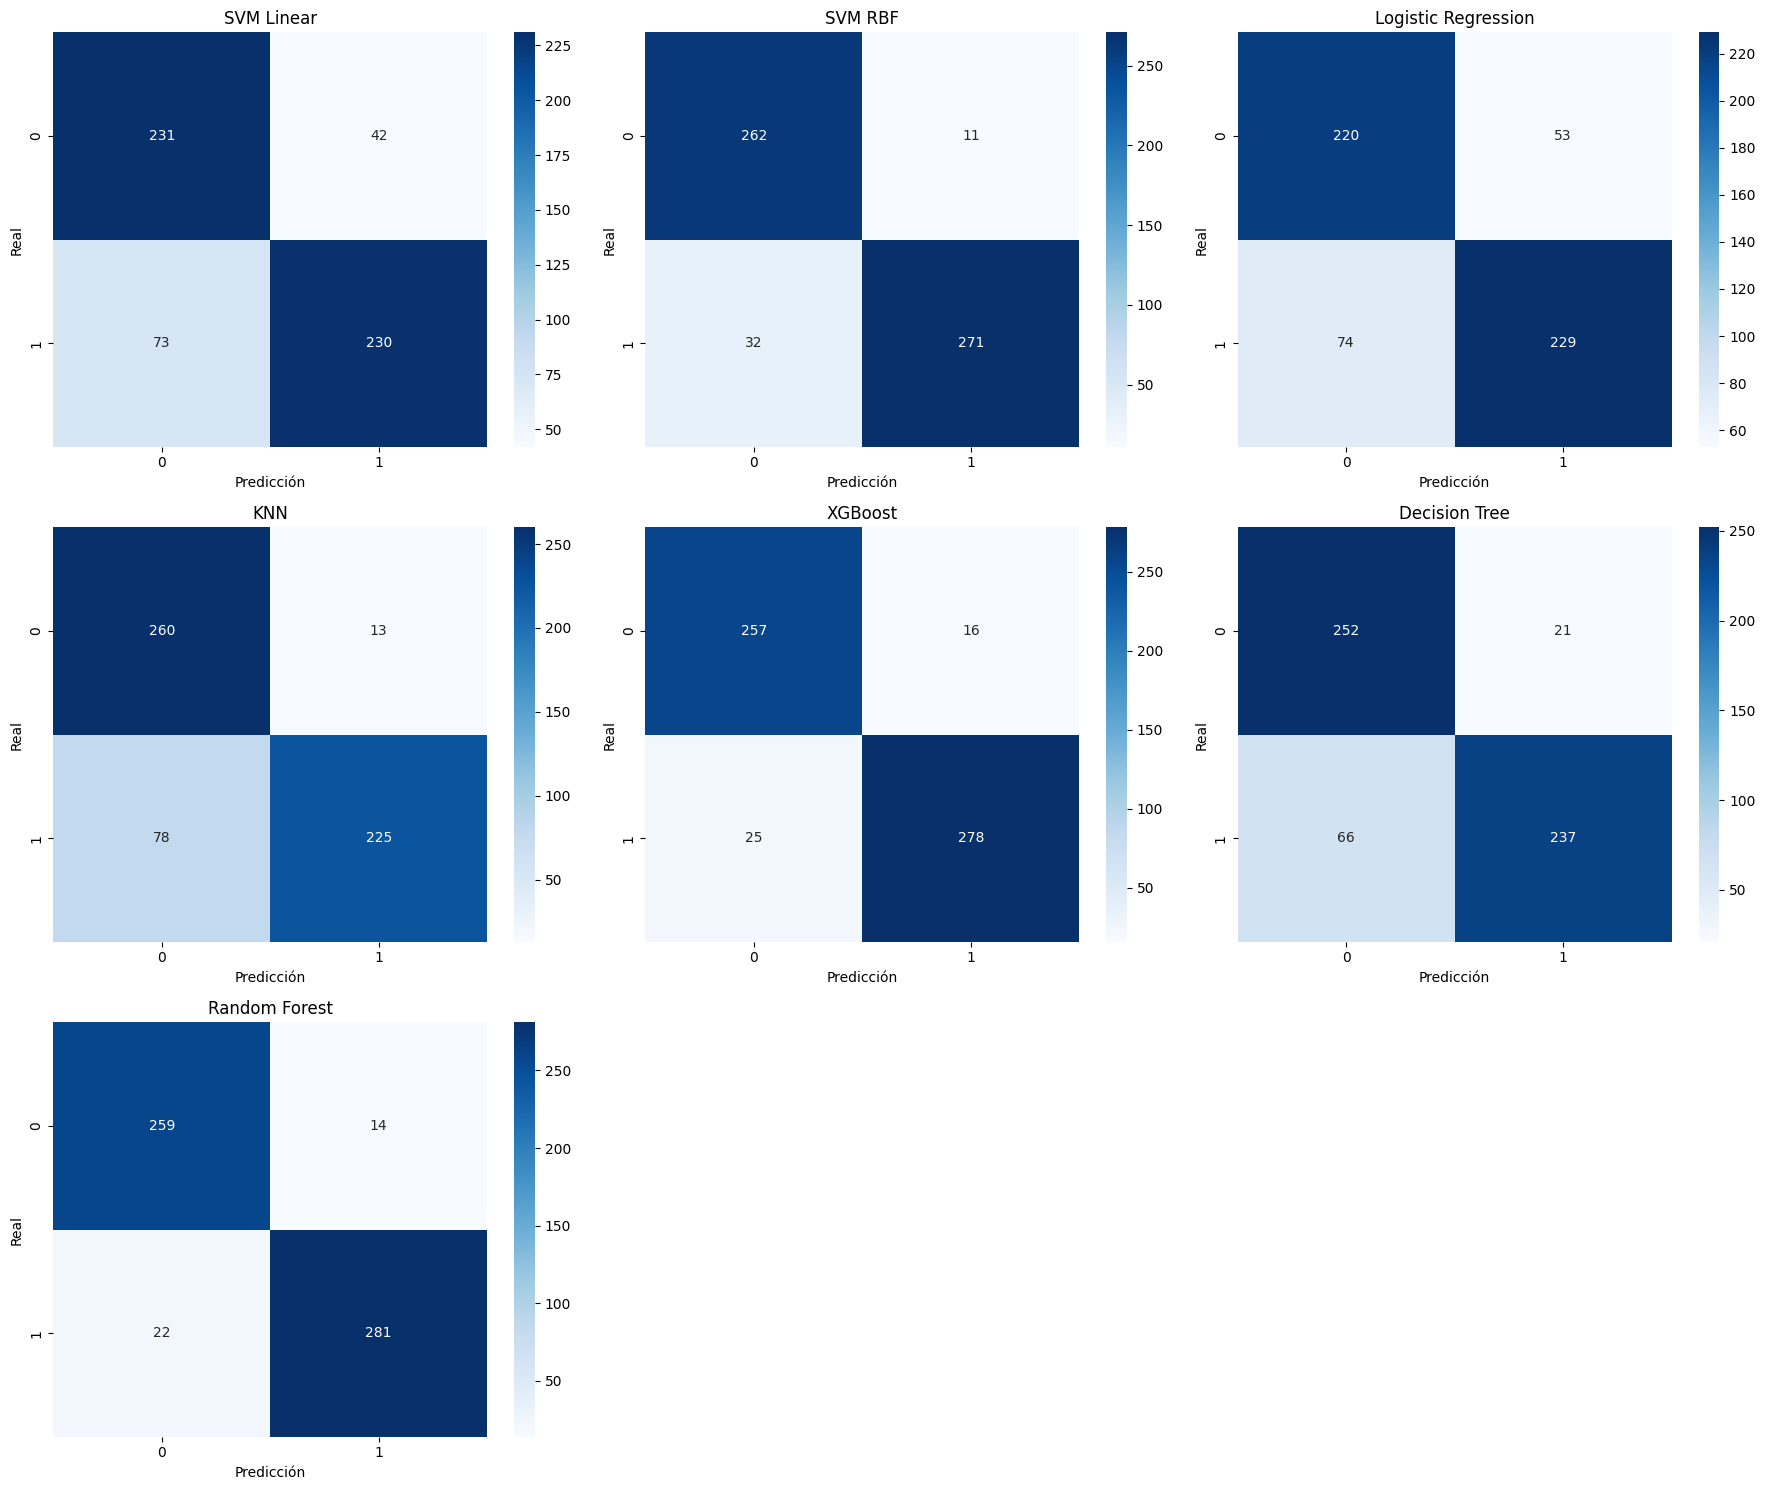

In [20]:
# Crear un subplot para cada matriz de confusión
fig, axs = plt.subplots(3, 3, figsize=(18, 15))

# Matriz de confusión SVM Linear
sns.heatmap(cm_SVM_linear, annot=True, fmt='d', cmap='Blues', ax=axs[0, 0])
axs[0, 0].set_title('SVM Linear')
axs[0, 0].set_xlabel('Predicción')
axs[0, 0].set_ylabel('Real')

# Matriz de confusión SVM RBF
sns.heatmap(cm_SVM_rbf, annot=True, fmt='d', cmap='Blues', ax=axs[0, 1])
axs[0, 1].set_title('SVM RBF')
axs[0, 1].set_xlabel('Predicción')
axs[0, 1].set_ylabel('Real')

# Matriz de confusión Logistic Regression
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', ax=axs[0, 2])
axs[0, 2].set_title('Logistic Regression')
axs[0, 2].set_xlabel('Predicción')
axs[0, 2].set_ylabel('Real')

# Matriz de confusión KNN
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axs[1, 0])
axs[1, 0].set_title('KNN')
axs[1, 0].set_xlabel('Predicción')
axs[1, 0].set_ylabel('Real')

# Matriz de confusión XGBoost
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', ax=axs[1, 1])
axs[1, 1].set_title('XGBoost')
axs[1, 1].set_xlabel('Predicción')
axs[1, 1].set_ylabel('Real')

# Matriz de confusión Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axs[1, 2])
axs[1, 2].set_title('Decision Tree')
axs[1, 2].set_xlabel('Predicción')
axs[1, 2].set_ylabel('Real')

# Matriz de confusión Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axs[2, 0])
axs[2, 0].set_title('Random Forest')
axs[2, 0].set_xlabel('Predicción')
axs[2, 0].set_ylabel('Real')

# Ocultar los subplots no utilizados
for i in range(2, 3):
    for j in range(1, 3):
        axs[i, j].axis('off')

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

### 4.3 Gráfico de barras para métricas de evaluación

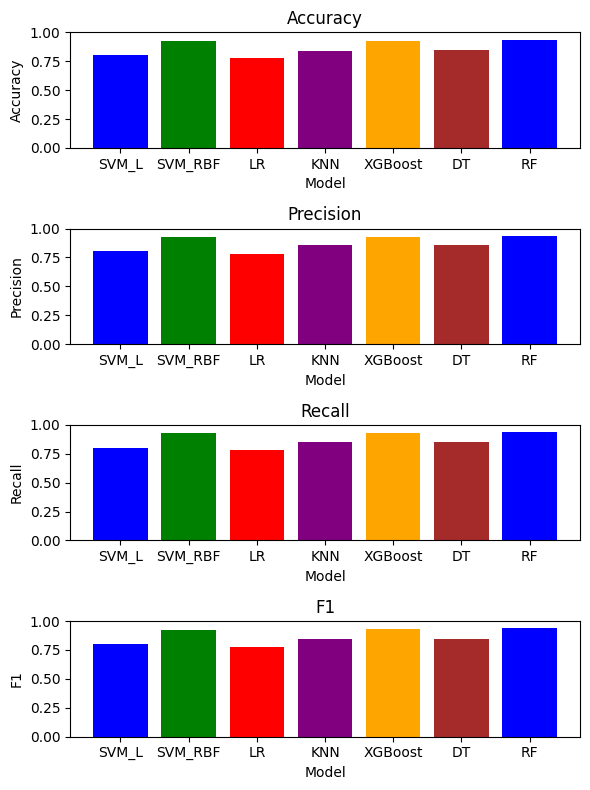

In [21]:
# Crear gráficos para cada métrica
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
num_models = len(model_metrics)
fig, axs = plt.subplots(len(metrics), figsize=(6, 8))

for i, metric in enumerate(metrics):
    values = [model_metrics[model][metric] for model in model_metrics]
    axs[i].bar(model_metrics.keys(), values, color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
    axs[i].set_title(f'{metric}')
    axs[i].set_ylim([0, 1])  # Asumiendo que las métricas están en escala de 0 a 1
    axs[i].set_ylabel(metric)
    axs[i].set_xlabel('Model')

# Ajustar el layout para evitar la superposición
plt.tight_layout()
plt.show()

### 4.4 Tabla de Comparación de Métricas de Modelos

In [22]:
# Supongamos que 'model_metrics' es tu diccionario con las métricas
# Convertimos el diccionario a DataFrame para presentarlo en forma de tabla
metrics_df = pd.DataFrame(model_metrics)

# Transponemos el DataFrame para tener los modelos en las filas y las métricas en las columnas
metrics_df = metrics_df.T

# Aplicamos un estilo para mejorar la visualización, esto solo funcionará en Jupyter Notebook o entornos que soporten formato de estilo para DataFrames de pandas.
styled_df = metrics_df.style.highlight_max(color='lightgreen', axis=0) \
                          .format("{:.2%}") \
                          .set_caption("Comparación de Métricas de Modelos")\
                          .set_properties(**{'text-align': 'center'}) \
                          .set_table_styles([{'selector': 'th',
                                              'props': [('background-color', '#585858'), 
                                                        ('color', 'white'),
                                                        ('text-align', 'center'),
                                                        ('font-weight', 'bold')]}])
styled_df

,Accuracy,Precision,Recall,F1
SVM_L,80.03%,80.27%,80.26%,80.03%
SVM_RBF,92.53%,92.61%,92.70%,92.53%
LR,77.95%,78.02%,78.08%,77.95%
KNN,84.20%,85.73%,84.75%,84.14%
XGBoost,92.88%,92.85%,92.94%,92.87%
DT,84.90%,85.55%,85.26%,84.89%
RF,93.75%,93.71%,93.81%,93.74%


## 5. Guardamos el modelo con mejores resultados 

### 5.1 Guardando el modelo en un archivo para su validación
Creamos el archivo del modelo entrenado para su validación con datos recogidos en el periodo 2024 primer bimestre de estudiantes de nivel secundaria.
Asimismo se usara para su integración dentro de una ejecutable web para las partes tambien de prueba y validación de funcionamiento.

In [23]:
import joblib    # Para guardar y cargar modelos

# Guardamos el modelo entrenado para uso futuro
joblib.dump(classifier_rf, 'trained_model.joblib')

# El modelo se guardará en el archivo 'xgb_model.joblib' en el directorio actual. 
# Puedes cargar este modelo luego para hacer nuevas predicciones de la siguiente manera:

# loaded_model = joblib.load('xgb_model.joblib')
# predictions = loaded_model.predict(new_data)

['trained_model.joblib']

## 6. Aplicamos la validación del modelo funcional
Probamos el modelo guardado con los datos de validacion de los estudiantes de 4to y 5to de sec en el periodo del 2024 del primer bimestre

### 6.1. Limpieza y transformación de datos

In [24]:
new_students_data = pd.read_excel("./dataset.xlsx","dataset_valid",usecols = 'B:W')

new_students_data["approved"] = students_data["GF"]>10
new_students_data.head()

,ID,year,period,grade,age,gender,famsize,Pstatus,Medu,Fedu,...,activities,higher,internet,famrel,freetime,health,G1_conduct,course,GF,approved
0,ES201445353,2024,1,5,16,Masculino,Tres o menos,Separados,Educacion Superior,Educacion Superior,...,no,yes,yes,Muy mal,2 a 5 horas,Mal,20,Historia del Perú,18,True
1,ES201445354,2024,1,5,16,Femenino,Tres o menos,Separados,Educacion Superior,Educacion Superior,...,no,yes,yes,Muy mal,2 a 5 horas,Mal,20,Razonamiento Matemático,19,True
2,ES201445355,2024,1,5,16,Masculino,Tres o menos,Separados,Educacion Superior,Educacion Superior,...,no,yes,yes,Muy mal,2 a 5 horas,Mal,20,Inglés,16,True
3,ES201445356,2024,1,5,16,Masculino,Tres o menos,Separados,Educacion Superior,Educacion Superior,...,no,yes,yes,Muy mal,2 a 5 horas,Mal,20,Razonamiento Verbal,17,True
4,ES201445357,2024,1,5,16,Femenino,Tres o menos,Separados,Educacion Superior,Educacion Superior,...,no,yes,yes,Muy mal,2 a 5 horas,Mal,20,Razonamiento Verbal,15,True


Editamos la data para funcionar con el modelo

In [25]:
les = LabelEncoder()
new_students_data['gender_code'] = les.fit_transform(new_students_data['gender'])
new_students_data['famsize_code'] = les.fit_transform(new_students_data['famsize'])
new_students_data['Pstatus_code'] = les.fit_transform(new_students_data['Pstatus'])
new_students_data['Medu_code'] = les.fit_transform(new_students_data['Medu'])
new_students_data['Fedu_code'] = les.fit_transform(new_students_data['Fedu'])
new_students_data['traveltime_code'] = les.fit_transform(new_students_data['traveltime'])
new_students_data['studytime_code'] = les.fit_transform(new_students_data['studytime'])
new_students_data['schoolsup_code'] = les.fit_transform(new_students_data['schoolsup'])
new_students_data['activities_code'] = les.fit_transform(new_students_data['activities'])
new_students_data['higher_code'] = les.fit_transform(new_students_data['higher'])
new_students_data['internet_code'] = les.fit_transform(new_students_data['internet'])
new_students_data['famrel_code'] = les.fit_transform(new_students_data['famrel'])
new_students_data['freetime_code'] = les.fit_transform(new_students_data['freetime'])
new_students_data['famrel_code'] = les.fit_transform(new_students_data['famrel'])
new_students_data['health_code'] = les.fit_transform(new_students_data['health'])
new_students_data['course_code'] = les.fit_transform(new_students_data['course'])
new_students_data['health_code'] = les.fit_transform(new_students_data['health'])
new_students_data['approved_code'] = les.fit_transform(new_students_data['approved'])

In [26]:
new_students_features=['year','period','grade','age','gender_code','famsize_code','Pstatus_code','Medu_code','Fedu_code',
                   'traveltime_code','studytime_code','schoolsup_code',
                   'activities_code','higher_code','internet_code','famrel_code','freetime_code','health_code','G1_conduct',
                   'course_code']
# Elimina NaNs
new_students_data_without_nans = new_students_data.dropna()

# Objetivo (variable a predecir)
yN = new_students_data_without_nans["approved_code"]

# Características (variables predictoras)
XN = new_students_data_without_nans[students_features]


new_students_data_without_nans.head()

,ID,year,period,grade,age,gender,famsize,Pstatus,Medu,Fedu,...,studytime_code,schoolsup_code,activities_code,higher_code,internet_code,famrel_code,freetime_code,health_code,course_code,approved_code
0,ES201445353,2024,1,5,16,Masculino,Tres o menos,Separados,Educacion Superior,Educacion Superior,...,0,0,0,1,1,2,0,2,0,1
1,ES201445354,2024,1,5,16,Femenino,Tres o menos,Separados,Educacion Superior,Educacion Superior,...,0,0,0,1,1,2,0,2,2,1
2,ES201445355,2024,1,5,16,Masculino,Tres o menos,Separados,Educacion Superior,Educacion Superior,...,0,0,0,1,1,2,0,2,1,1
3,ES201445356,2024,1,5,16,Masculino,Tres o menos,Separados,Educacion Superior,Educacion Superior,...,0,0,0,1,1,2,0,2,3,1
4,ES201445357,2024,1,5,16,Femenino,Tres o menos,Separados,Educacion Superior,Educacion Superior,...,0,0,0,1,1,2,0,2,3,1


In [27]:
XN.head()

,year,period,grade,age,gender_code,famsize_code,Pstatus_code,Medu_code,Fedu_code,traveltime_code,studytime_code,schoolsup_code,activities_code,higher_code,internet_code,famrel_code,freetime_code,health_code,G1_conduct,course_code
0,2024,1,5,16,1,1,0,2,2,0,0,0,0,1,1,2,0,2,20,0
1,2024,1,5,16,0,1,0,2,2,0,0,0,0,1,1,2,0,2,20,2
2,2024,1,5,16,1,1,0,2,2,0,0,0,0,1,1,2,0,2,20,1
3,2024,1,5,16,1,1,0,2,2,0,0,0,0,1,1,2,0,2,20,3
4,2024,1,5,16,0,1,0,2,2,0,0,0,0,1,1,2,0,2,20,3


### 6.2. Cargamos y ejecutamos el modelo entrenado

In [28]:
from pickle import load         # Para cargar modelos serializados con pickle

modelo_cargado = joblib.load('trained_model.joblib')

In [29]:
predictions = modelo_cargado.predict(XN)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

### 6.3 Guardamos predicciones realizadas en Excel

In [30]:
# Convertir predicciones en formato EXCEL para comparación visual
# Datos proporcionados
data = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1]

# Crear un DataFrame
df = pd.DataFrame(data, columns=['Approved Code'])

# Guardar el DataFrame en un archivo Excel
df.to_excel('approved_codes.xlsx', index=False)

print("Los datos se han guardado en 'approved_codes.xlsx'")


Los datos se han guardado en 'approved_codes.xlsx'


### 6.4 Metricas de precision de la prediccion para validacion

In [31]:
from tabulate import tabulate     # Para mostrar datos en formato de tabla en la consola

# Modelo Cargado
modelo_cargado = joblib.load('trained_model.joblib')

# Realiza predicciones en los datos cargados
predictions = modelo_cargado.predict(XN)

# Calcula las métricas de evaluación
accuracy = accuracy_score(yN, predictions)
precision = precision_score(yN, predictions)
recall = recall_score(yN, predictions)
f1 = f1_score(yN, predictions)
classification_rep = classification_report(yN, predictions, output_dict=True)

# Tabla de métricas
table = [
    ["Metrica", "Valor"],
    ["Accuracy", f"{accuracy:.4f}"],
    ["Precision", f"{precision:.4f}"],
    ["Recall", f"{recall:.4f}"],
    ["F1 Score", f"{f1:.4f}"]
]

# Imprime la tabla de métricas
print("\nMétricas de Evaluación:")
print(tabulate(table, headers="firstrow", tablefmt="grid"))

# Tabla de informe de clasificación
table = []
for key, value in classification_rep.items():
    if key in ['0', '1']:
        table.append([f"Clase {key}", value['precision'], value['recall'], value['f1-score'], value['support']])
table.insert(0, ["Clase", "Precisión", "Recall", "F1-Score", "Support"])

# Imprime la tabla de informe de clasificación
print("\nInforme de Clasificación:")
print(tabulate(table, headers="firstrow", tablefmt="grid"))


Métricas de Evaluación:
+-----------+---------+
| Metrica   |   Valor |
+===========+=========+
| Accuracy  |  0.8828 |
+-----------+---------+
| Precision |  0.9826 |
+-----------+---------+
| Recall    |  0.8968 |
+-----------+---------+
| F1 Score  |  0.9378 |
+-----------+---------+

Informe de Clasificación:
+---------+-------------+----------+------------+-----------+
| Clase   |   Precisión |   Recall |   F1-Score |   Support |
+=========+=============+==========+============+===========+
| Clase 0 |    0        | 0        |   0        |         2 |
+---------+-------------+----------+------------+-----------+
| Clase 1 |    0.982609 | 0.896825 |   0.937759 |       126 |
+---------+-------------+----------+------------+-----------+


In [32]:
# Crea una copia del DataFrame original
new_students_data_predictions = new_students_data_without_nans.copy()

# Agrega la columna de predicciones al DataFrame
new_students_data_predictions['predictions'] = predictions

# Divide las predicciones por alumnos de 4 y 5 de secundaria
students_4_sec = new_students_data_predictions[new_students_data_predictions['grade'] == 4]
students_5_sec = new_students_data_predictions[new_students_data_predictions['grade'] == 5]

# Divide las predicciones por cursos para alumnos de 4 de secundaria
courses_4_sec = students_4_sec.groupby('course')['predictions'].value_counts().unstack().fillna(0)
courses_4_sec['total'] = courses_4_sec.sum(axis=1)

# Divide las predicciones por cursos para alumnos de 5 de secundaria
courses_5_sec = students_5_sec.groupby('course')['predictions'].value_counts().unstack().fillna(0)
courses_5_sec['total'] = courses_5_sec.sum(axis=1)

# Muostra los resultados
print("Predicciones para alumnos de 4 de secundaria por curso:")
print(courses_4_sec)

print("\nPredicciones para alumnos de 5 de secundaria por curso:")
print(courses_5_sec)

Predicciones para alumnos de 4 de secundaria por curso:
predictions              0   1  total
course                               
Historia del Perú        2  17     19
Inglés                   1  18     19
Razonamiento Matemático  3  16     19
Razonamiento Verbal      7  12     19

Predicciones para alumnos de 5 de secundaria por curso:
predictions               1  total
course                            
Historia del Perú        13     13
Inglés                   13     13
Razonamiento Matemático  13     13
Razonamiento Verbal      13     13


In [33]:
# Métricas de prediccion de alumnos de 4 de secundaria por curso
metrics_4_sec = {}
for course in courses_4_sec.index:
    y_true = students_4_sec[students_4_sec['course'] == course]['approved_code']
    y_pred = students_4_sec[students_4_sec['course'] == course]['predictions']
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    metrics_4_sec[course] = report['1']

# Métricas de prediccion de alumnos de 5 de secundaria por curso
metrics_5_sec = {}
for course in courses_5_sec.index:
    y_true = students_5_sec[students_5_sec['course'] == course]['approved_code']
    y_pred = students_5_sec[students_5_sec['course'] == course]['predictions']
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    metrics_5_sec[course] = report['1']

# Muostra las métricas para alumnos de 4 de secundaria por curso
print("Métricas para alumnos de 4 de secundaria por curso:")
for course, metrics in metrics_4_sec.items():
    print(f"\nCurso: {course}")
    print(f"Precisión: {metrics['precision']}")
    print(f"Recall: {metrics['recall']}")
    print(f"F1-score: {metrics['f1-score']}")
    print(f"Support: {metrics['support']}")

# Muostra las métricas para alumnos de 5 de secundaria por curso
print("\nMétricas para alumnos de 5 de secundaria por curso:")
for course, metrics in metrics_5_sec.items():
    print(f"\nCurso: {course}")
    print(f"Precisión: {metrics['precision']}")
    print(f"Recall: {metrics['recall']}")
    print(f"F1-score: {metrics['f1-score']}")
    print(f"Support: {metrics['support']}")

Métricas para alumnos de 4 de secundaria por curso:

Curso: Historia del Perú
Precisión: 1.0
Recall: 0.8947368421052632
F1-score: 0.9444444444444444
Support: 19.0

Curso: Inglés
Precisión: 1.0
Recall: 0.9473684210526315
F1-score: 0.972972972972973
Support: 19.0

Curso: Razonamiento Matemático
Precisión: 0.9375
Recall: 0.8333333333333334
F1-score: 0.8823529411764706
Support: 18.0

Curso: Razonamiento Verbal
Precisión: 0.9166666666666666
Recall: 0.6111111111111112
F1-score: 0.7333333333333333
Support: 18.0

Métricas para alumnos de 5 de secundaria por curso:

Curso: Historia del Perú
Precisión: 1.0
Recall: 1.0
F1-score: 1.0
Support: 13.0

Curso: Inglés
Precisión: 1.0
Recall: 1.0
F1-score: 1.0
Support: 13.0

Curso: Razonamiento Matemático
Precisión: 1.0
Recall: 1.0
F1-score: 1.0
Support: 13.0

Curso: Razonamiento Verbal
Precisión: 1.0
Recall: 1.0
F1-score: 1.0
Support: 13.0


### 6.5 Reporte de total de predicciones, número de aciertos y porcentaje de precisión global.

In [34]:
# Define una función para comparar las predicciones con la data real y contar los aciertos
def compare_predictions(actual, predicted):
    correct_predictions = (actual == predicted).sum()
    total_predictions = len(actual)
    accuracy = correct_predictions / total_predictions
    return correct_predictions, total_predictions, accuracy

# Predicciones para alumnos de 4 de secundaria
actual_4_sec = students_4_sec['approved_code']
predicted_4_sec = students_4_sec['predictions']
correct_4_sec, total_4_sec, accuracy_4_sec = compare_predictions(actual_4_sec, predicted_4_sec)

# Predicciones para alumnos de 5 de secundaria
actual_5_sec = students_5_sec['approved_code']
predicted_5_sec = students_5_sec['predictions']
correct_5_sec, total_5_sec, accuracy_5_sec = compare_predictions(actual_5_sec, predicted_5_sec)

# Mostrar los resultados
print("\nComparación de predicciones con la data real para alumnos de 4 de secundaria:")
print(f"Total de predicciones: {total_4_sec}, Aciertos: {correct_4_sec}, Precisión: {accuracy_4_sec}")

print("\nComparación de predicciones con la data real para alumnos de 5 de secundaria:")
print(f"Total de predicciones: {total_5_sec}, Aciertos: {correct_5_sec}, Precisión: {accuracy_5_sec}")



Comparación de predicciones con la data real para alumnos de 4 de secundaria:
Total de predicciones: 76, Aciertos: 61, Precisión: 0.8026315789473685

Comparación de predicciones con la data real para alumnos de 5 de secundaria:
Total de predicciones: 52, Aciertos: 52, Precisión: 1.0


### 6.6 Matriz de confusión de las predicciones para los datos de validación

In [35]:
# Función para comparar predicciones con la data real
def compare_predictions(y_true, y_pred, labels):
    accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    return accuracy, cm

# Definir las etiquetas posibles
labels = [0, 1]  # Suponiendo que las etiquetas son 0 y 1

# Comparar predicciones para alumnos de 4 de secundaria
y_true_4_sec = students_4_sec['approved_code']
y_pred_4_sec = students_4_sec['predictions']
accuracy_4_sec, cm_4_sec = compare_predictions(y_true_4_sec, y_pred_4_sec, labels)

# Comparar predicciones para alumnos de 5 de secundaria
y_true_5_sec = students_5_sec['approved_code']
y_pred_5_sec = students_5_sec['predictions']
accuracy_5_sec, cm_5_sec = compare_predictions(y_true_5_sec, y_pred_5_sec, labels)

# Mostrar los resultados
print("\nComparación de predicciones con la data real para alumnos de 4 de secundaria:")
print(f"Accuracy: {accuracy_4_sec}")
print("Confusion Matrix:")
print(cm_4_sec)

print("\nComparación de predicciones con la data real para alumnos de 5 de secundaria:")
print(f"Accuracy: {accuracy_5_sec}")
print("Confusion Matrix:")
print(cm_5_sec)


Comparación de predicciones con la data real para alumnos de 4 de secundaria:
Accuracy: 0.8026315789473685
Confusion Matrix:
[[ 0  2]
 [13 61]]

Comparación de predicciones con la data real para alumnos de 5 de secundaria:
Accuracy: 1.0
Confusion Matrix:
[[ 0  0]
 [ 0 52]]
